# Short Photo Retrieval

## Part 0 Introduction and Motivation

The objetive of the repository is to share a quick example using descriptors of multimedia information (pictures in this case).

The use of descriptors of pictures is motivated by a reduction of the number of calculations needed to compare them and to create descriptors that fit the properties we want to point out about hhe pictures in each case.  This descriptors reduce considerably the amount of info that we need to compare, in this example the landscape pictures have a size between hundred of KB to nearly 2 MB and the descriptors have a size of 1 KB, that's great change!

We'll use open CV and scipy, two useful libraries when working with images and making calculations, respectively.

In [1]:
#First we import the libraries we will use

import sys
import os
import numpy as np
import cv2
import easygui
from subprocess import *
import matplotlib.pyplot as plt
import scipy
from scipy.spatial import distance


In this short example we wil use 10 pictures from different landscapes, show in the next block

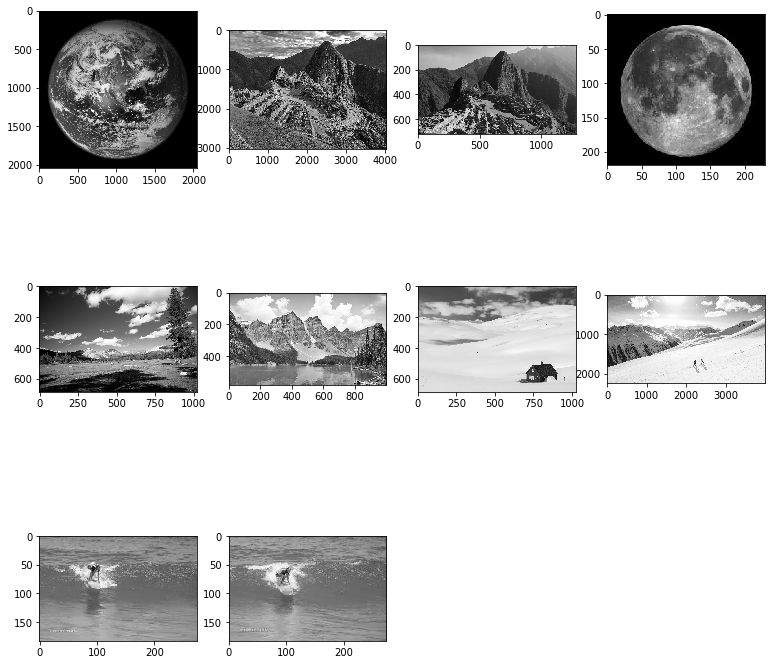

In [2]:
folder_fotos='C:/Users/Hewlett Packard/Desktop/Fotos'

#Now we Select the path of our picture's folder 

folder_fotos='C:/Users/Hewlett Packard/Desktop/Fotos'

full_path=os.path.abspath(folder_fotos)     #Path of the folder containing the pictures
path='C:/Users/Hewlett Packard/Desktop/'    #Desktop path
a=os.listdir(full_path)                     #Save the name of each picture in the folder

plt.figure(figsize=(13,13))
for i in range(len(a)):
    b=i+1
    plt.subplot(3,4,b), plt.imshow(cv2.cvtColor(cv2.imread(full_path+'/'+a[i], cv2.IMREAD_COLOR), cv2.COLOR_BGR2GRAY),'gray')
    #We show the pictures in gray

plt.show()

## Part 1 Creating the descriptors


In [3]:
#We create a folder where we'll keep our descriptors in the desktop

os.mkdir(path+'Descriptors')  
desc=path+'Descriptors'

### Example of the descriptors

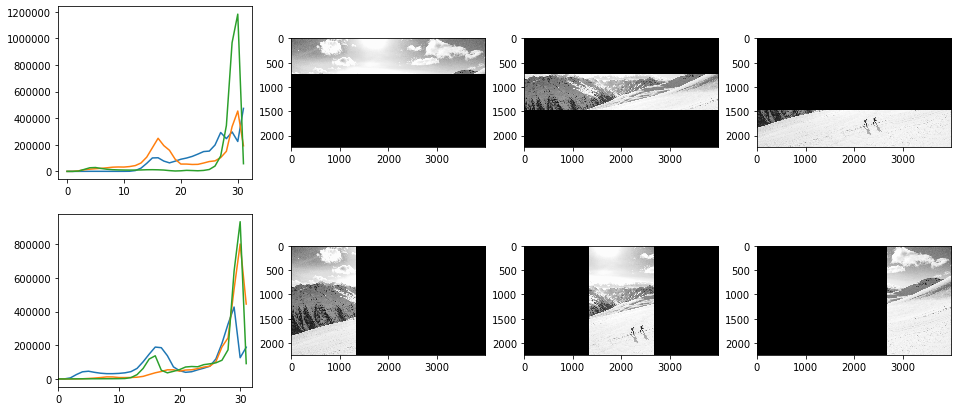

In [4]:
#We create a simple descriptor using histograms by zone, with both vertical and horizontal masks.

image_color = cv2.imread(full_path+'/'+a[7], cv2.IMREAD_COLOR) #Original Picture
image_gray = cv2.cvtColor(image_color, cv2.COLOR_BGR2GRAY)     #For simplicity we use gray versions of our pictures

#We define the masks we'll be using
image1=image_gray
image2=image_color = cv2.cvtColor(cv2.imread(full_path+'/'+a[7], cv2.IMREAD_COLOR), cv2.COLOR_BGR2GRAY)  #Original Picture

#Masks

#Create a mask for image 1
mask_1 = np.zeros(image1.shape[:2], np.uint8)
mask_1[0:round(image1.shape[0]/3), :] = 255
mask_2 = np.zeros(image1.shape[:2], np.uint8)
mask_2[round(image1.shape[0]/3):round(image1.shape[0]*2/3), :] = 255
mask_3 = np.zeros(image1.shape[:2], np.uint8)
mask_3[round(image1.shape[0]*2/3):round(image1.shape[0]), :] = 255
masked_img_1 = cv2.bitwise_and(image1,image1,mask = mask_1)
masked_img_2 = cv2.bitwise_and(image1,image1,mask = mask_2)
masked_img_3 = cv2.bitwise_and(image1,image1,mask = mask_3)
hist_mask_1 = cv2.calcHist([image1],[0],mask_1,[32],[0,256])
hist_mask_2 = cv2.calcHist([image1],[0],mask_2,[32],[0,256])
hist_mask_3 = cv2.calcHist([image1],[0],mask_3,[32],[0,256])
hist_full = cv2.calcHist([image1],[0],None,[32],[0,256])

# create a mask for image 2
mask_4 = np.zeros(image2.shape[:2], np.uint8)
mask_4[:,0:round( image2.shape[1]/3)] = 255
mask_5 = np.zeros(image2.shape[:2], np.uint8)
mask_5[:, round(image2.shape[1]/3):round(image2.shape[1]*2/3)] = 255
mask_6 = np.zeros(image2.shape[:2], np.uint8)
mask_6[:,round(image2.shape[1]*2/3):round( image2.shape[1])] = 255
masked_img_4 = cv2.bitwise_and(image2,image2,mask = mask_4)
masked_img_5 = cv2.bitwise_and(image2,image2,mask = mask_5)
masked_img_6 = cv2.bitwise_and(image2,image2,mask = mask_6)
hist_mask_4 = cv2.calcHist([image2],[0],mask_4,[32],[0,256])
hist_mask_5 = cv2.calcHist([image2],[0],mask_5,[32],[0,256])
hist_mask_6 = cv2.calcHist([image2],[0],mask_6,[32],[0,256])
hist_full = cv2.calcHist([image2],[0],None,[32],[0,256])


plt.figure(figsize=(16,7))
plt.subplot(242), plt.imshow(masked_img_1, 'gray')
plt.subplot(243), plt.imshow(masked_img_2,'gray')
plt.subplot(244), plt.imshow(masked_img_3, 'gray')
plt.subplot(241), plt.plot(hist_mask_1), plt.plot(hist_mask_2), plt.plot(hist_mask_3)
plt.subplot(246), plt.imshow(masked_img_4, 'gray')
plt.subplot(247), plt.imshow(masked_img_5,'gray')
plt.subplot(248), plt.imshow(masked_img_6, 'gray')
plt.subplot(245), plt.plot(hist_mask_4), plt.plot(hist_mask_5), plt.plot(hist_mask_6)
plt.xlim([0,32])
plt.show()

### Creation of our descirptors

In [5]:
#We create a simple descriptor using histograms by zone, with both vertical and horizontal masks. 

for i in range (len(a)):
    image_color = cv2.imread(full_path+'/'+a[i], cv2.IMREAD_COLOR) #Original Picture
    image_gray = cv2.cvtColor(image_color, cv2.COLOR_BGR2GRAY)     #For simplicity we use gray versions of our pictures
    image=image_gray
    resized=cv2.resize(image_gray,(10,10))                         #Reshape
    A_mat = np.matrix.flatten(np.squeeze(np.asarray(resized)))
    # Masks

    #Create masks for horizontal histograms
    mask_1 = np.zeros(image.shape[:2], np.uint8)
    mask_1[0:round(image.shape[0]/3), :] = 255
    mask_2 = np.zeros(image.shape[:2], np.uint8)
    mask_2[round(image.shape[0]/3):round(image.shape[0]*2/3), :] = 255
    mask_3 = np.zeros(image.shape[:2], np.uint8)
    mask_3[round(image.shape[0]*2/3):round(image.shape[0]), :] = 255
    masked_img_1 = cv2.bitwise_and(image,image,mask = mask_1)
    masked_img_2 = cv2.bitwise_and(image,image,mask = mask_2)
    masked_img_3 = cv2.bitwise_and(image,image,mask = mask_3)
    hist_mask_1 = cv2.calcHist([image],[0],mask_1,[32],[0,256])
    hist_mask_2 = cv2.calcHist([image],[0],mask_2,[32],[0,256])
    hist_mask_3 = cv2.calcHist([image],[0],mask_3,[32],[0,256])
    
    #Create masks for vertical histograms
    mask_4 = np.zeros(image.shape[:2], np.uint8)
    mask_4[:,0:round( image.shape[1]/3)] = 255
    mask_5 = np.zeros(image.shape[:2], np.uint8)
    mask_5[:, round(image.shape[1]/3):round(image.shape[1]*2/3)] = 255
    mask_6 = np.zeros(image.shape[:2], np.uint8)
    mask_6[:,round(image.shape[1]*2/3):round( image.shape[1])] = 255
    masked_img_4 = cv2.bitwise_and(image,image,mask = mask_4)
    masked_img_5 = cv2.bitwise_and(image,image,mask = mask_5)
    masked_img_6 = cv2.bitwise_and(image,image,mask = mask_6)
    hist_mask_4 = cv2.calcHist([image],[0],mask_4,[32],[0,256])
    hist_mask_5 = cv2.calcHist([image],[0],mask_5,[32],[0,256])
    hist_mask_6 = cv2.calcHist([image],[0],mask_6,[32],[0,256])
    hist_full = cv2.calcHist([image],[0],None,[32],[0,256])

    B_mat = np.matrix.flatten(np.squeeze(np.asarray(hist_mask_1)))
    C_mat = np.matrix.flatten(np.squeeze(np.asarray(hist_mask_2)))
    D_mat = np.matrix.flatten(np.squeeze(np.asarray(hist_mask_3)))
    E_mat = np.matrix.flatten(np.squeeze(np.asarray(hist_mask_1)))
    F_mat = np.matrix.flatten(np.squeeze(np.asarray(hist_mask_2)))
    G_mat = np.matrix.flatten(np.squeeze(np.asarray(hist_mask_3)))
    
    #Concatenation of our 6 histograms
    vec=np.concatenate((B_mat,C_mat,D_mat,E_mat,F_mat,G_mat))
    
    #Saving each vector
    np.save(path+'Descriptors'+'/picture_'+a[i]+'.npy' , vec)

## Part 2 Comparison of our descriptors

### We create a small function to compare the values of our descriptors

In [6]:
def knn_foto(original):                                                  # original it's the chosen picture
    foto_original=np.load(path+'/Descriptors/picture_'+original+'.npy')
    lista=[]
    for num_foto in range(len(a)):
        foto_nom=a[num_foto]
        foto=np.load(path+'Descriptors'+'/picture_'+foto_nom+'.npy')    #path to our picture
        if foto_nom==original:                                           #skip the comparison with itself 
            continue
        if foto_nom!= original:
            dist=scipy.spatial.distance.euclidean(foto_original,foto)
            foto_distancia=(foto_nom,dist)
            lista.append(foto_distancia)
    return lista 

### Test

First we check the order of similarity for the first picture of a surfer

 KNN 1 Foto surfer_2.jfif a distancia 4677.095703125
 KNN 2 Foto moon_1.jfif a distancia 24078.5234375
 KNN 3 Foto rocks.jpg a distancia 107517.5078125
 KNN 4 Foto mountain.jpg a distancia 116236.578125
 KNN 5 Foto machu-picchu-2.jpg a distancia 182621.953125
 KNN 6 Foto snow_1.jpg a distancia 263037.25
 KNN 7 Foto Earth_Western_Hemisphere.jpg a distancia 1496979.0
 KNN 8 Foto machu-picchu-1.jpg a distancia 2304316.25
 KNN 9 Foto snow_2.jpg a distancia 2739529.5


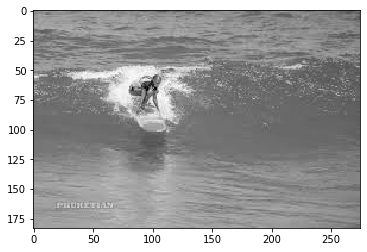

In [7]:
distancias=knn_foto("surfer_1.jfif")   

k_vecinos_sorted=sorted(distancias, key=lambda x: x[1])
for i in range (len(distancias)):
    print ( " KNN {} Foto {} a distancia {}" .format(i+1,k_vecinos_sorted [i][0],k_vecinos_sorted [i][1]) )

#show the KNN
k_vecinos_sorted [0][0]
image = cv2.imread(full_path+'/'+k_vecinos_sorted [0][0], cv2.IMREAD_COLOR);
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(image_gray, 'gray')
plt.show()


The most similar is the second picture of the surfer.

Now we do the same for the picture of snow

 KNN 1 Foto snow_1.jpg a distancia 2671119.75
 KNN 2 Foto rocks.jpg a distancia 2698413.25
 KNN 3 Foto mountain.jpg a distancia 2714395.5
 KNN 4 Foto machu-picchu-2.jpg a distancia 2718679.25
 KNN 5 Foto surfer_2.jfif a distancia 2739364.25
 KNN 6 Foto surfer_1.jfif a distancia 2739529.5
 KNN 7 Foto moon_1.jfif a distancia 2741001.25
 KNN 8 Foto Earth_Western_Hemisphere.jpg a distancia 3056516.75
 KNN 9 Foto machu-picchu-1.jpg a distancia 3292827.25


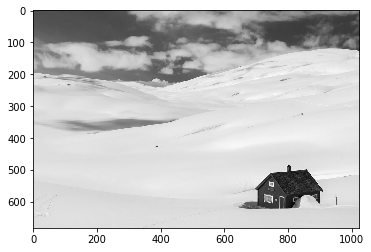

In [8]:
distancias=knn_foto("snow_2.jpg")   

k_vecinos_sorted=sorted(distancias, key=lambda x: x[1])
for i in range (len(distancias)):
    print ( " KNN {} Foto {} a distancia {}" .format(i+1,k_vecinos_sorted [i][0],k_vecinos_sorted [i][1]) )

#show the KNN
k_vecinos_sorted [0][0]
image = cv2.imread(full_path+'/'+k_vecinos_sorted [0][0], cv2.IMREAD_COLOR);
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(image_gray, 'gray')
plt.show()


Now we check the most similar for the photo of machu picchu

 KNN 1 Foto machu-picchu-2.jpg a distancia 2166651.0
 KNN 2 Foto mountain.jpg a distancia 2222224.0
 KNN 3 Foto rocks.jpg a distancia 2247287.0
 KNN 4 Foto snow_1.jpg a distancia 2295108.25
 KNN 5 Foto moon_1.jfif a distancia 2303227.5
 KNN 6 Foto surfer_2.jfif a distancia 2304310.75
 KNN 7 Foto surfer_1.jfif a distancia 2304316.25
 KNN 8 Foto Earth_Western_Hemisphere.jpg a distancia 2308553.25
 KNN 9 Foto snow_2.jpg a distancia 3292827.25


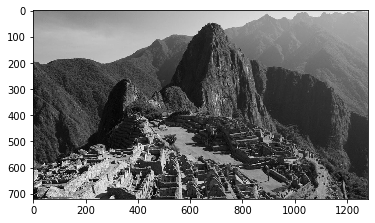

In [9]:
distancias=knn_foto("machu-picchu-1.jpg")   

k_vecinos_sorted=sorted(distancias, key=lambda x: x[1])
for i in range (len(distancias)):
    print ( " KNN {} Foto {} a distancia {}" .format(i+1,k_vecinos_sorted [i][0],k_vecinos_sorted [i][1]) )

#show the KNN
k_vecinos_sorted [0][0]
image = cv2.imread(full_path+'/'+k_vecinos_sorted [0][0], cv2.IMREAD_COLOR);
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(image_gray, 'gray')
plt.show()


For our final test, we check the similarity of the picture of the moon

 KNN 1 Foto surfer_2.jfif a distancia 23398.580078125
 KNN 2 Foto surfer_1.jfif a distancia 24078.5234375
 KNN 3 Foto rocks.jpg a distancia 111237.78125
 KNN 4 Foto mountain.jpg a distancia 114783.4453125
 KNN 5 Foto machu-picchu-2.jpg a distancia 184480.203125
 KNN 6 Foto snow_1.jpg a distancia 264145.28125
 KNN 7 Foto Earth_Western_Hemisphere.jpg a distancia 1479713.25
 KNN 8 Foto machu-picchu-1.jpg a distancia 2303227.5
 KNN 9 Foto snow_2.jpg a distancia 2741001.25


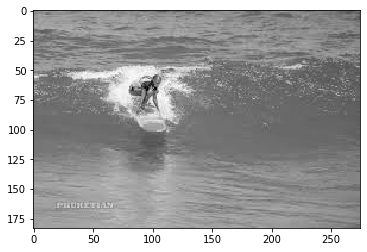

In [10]:
distancias=knn_foto("moon_1.jfif")   

k_vecinos_sorted=sorted(distancias, key=lambda x: x[1])
for i in range (len(distancias)):
    print ( " KNN {} Foto {} a distancia {}" .format(i+1,k_vecinos_sorted [i][0],k_vecinos_sorted [i][1]) )

#show the KNN
k_vecinos_sorted [0][0]
image = cv2.imread(full_path+'/'+k_vecinos_sorted [0][0], cv2.IMREAD_COLOR);
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(image_gray, 'gray')
plt.show()

The descriptor it's more similar to the descriptors of the surfers.

## Part 3 Conclusions

We have created our first picture organizer, where we can search for similar pictures (understanding similarity according to different descriptors). Is this small example we created a descriptor based on histograms of different sections of the pictures, using vertical and horizontal masks. We obtained satisfactory results in terms of the similarity we hoped to find. The crucial part of this process is to select the right descriptor for your project.

We used the libraries open CV to create our descriptors and Scipy compare the values contained in them. 

I hope that this example can be of help for anyone starting in the area of Multimedia Information Retrieval. 